# AIR QUALITY INDEX PREDICTION USING TIME SERIES :

In [ ]:
pip install download

In [15]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from download import download

In [6]:
#download the zip file into temp folder named 'aq' for Air Quality
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/tmp/aq', kind="zip")

Creating data folder...

file_sizes: 100%|███████████████████████████| 7.96M/7.96M [00:13<00:00, 577kB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [20]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [21]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Next is to convert the date, time columns into pandas 'datetimeindex' type

In [17]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [71]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates=[['year','month','day','hour']], date_parser = convert_to_date, keep_date_col = True)

In [23]:
aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [24]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [25]:
#convert the month column into numeric type:
aq_df['month'] =  pd.to_numeric(aq_df['month'])

In [26]:
print("Rows     :", aq_df.shape[0])
print("Columns  :", aq_df.shape[1])
print("\n Features \n", aq_df.columns.to_list())
print("\n Missing Values \n", aq_df.isnull().any())
print("\n Unique Values \n", aq_df.nunique())

Rows     : 35064
Columns  : 19

 Features 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

 Missing Values 
 year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

 Unique Values 
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5               

So we can see from above that there are missing values present.

In [72]:
aq_df_non_indexed = aq_df.copy()

In [73]:
#Set the column 'year_month_day_hour' as index : It makes data filteration easier on any time series.
#The main advantage of indexing is we can query it very fast
#We can do a lot of subsetting and filtering
#A lot of plots needs indexed data
aq_df = aq_df.set_index('year_month_day_hour')

In [28]:
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [33]:
#chech data for a selected range of time as shown here :
aq_df.loc['2013' : '2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


In [74]:
#taking only the target column from the dataframe and assigning it to a different dataframe :
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

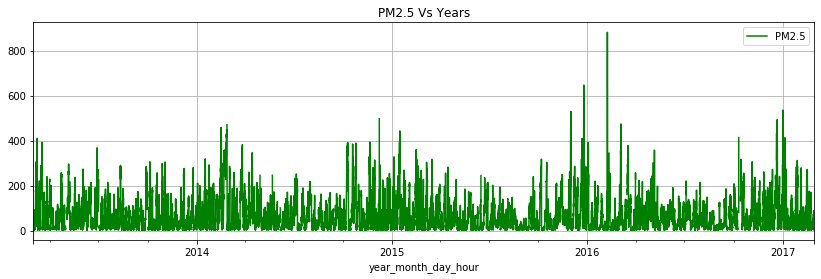

In [75]:
#plot only this column data :
pm_data.plot(grid = True, figsize=(14,4), legend=True, title='PM2.5 Vs Years', color='green')

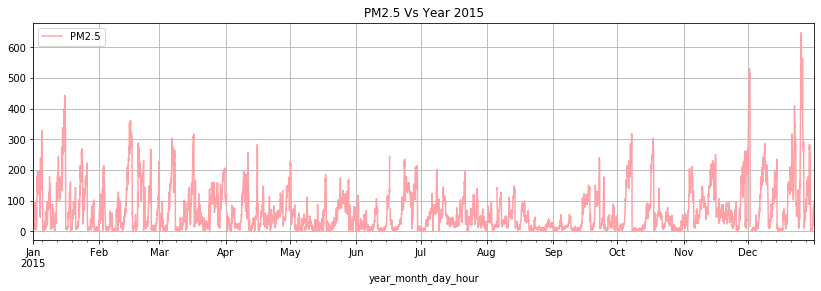

In [76]:
#Let's see the 'PM2.5' data with only 1 year : 
#'#ccc111'
aq_df_2015 = aq_df.loc['2015']
pm_data_2015 = aq_df_2015['PM2.5']
pm_data_2015.plot(grid = True, figsize=(14,4), legend=True, title='PM2.5 Vs Year 2015', color='#ffa2a7')

In [83]:
#Let's see the data more interactively using plotly for all the years :
import plotly.express as px
fig = px.line(aq_df_non_indexed, x = 'year_month_day_hour', y = 'PM2.5', title = 'PM2.5 Vs Years With Slider')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1y',step='year',stepmode = "backward"),
                        dict(count = 2,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 3,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B742D50108>,
      dtype=object)

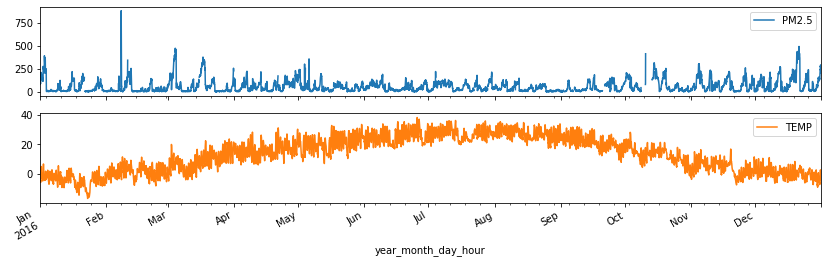

In [85]:
#Let's see now 2 featues 'PM2.5' and 'TEMP' for the year 2016 only :
aq_df_2015 = aq_df['2016']
pm_data_2015 = aq_df_2015[['PM2.5','TEMP']]
pm_data_2015.plot(subplots = True, figsize=(14,4))

So, there is a visible negative correlation present between 'PM2.5' and 'TEMP' with different months. If temperatue falls, PM2.5 increases and vice-versa.

## Time Series Lag Scatter Plots :

Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

lag plot is a special type of lag scatter plot where x axis is the cuurent time and the y axis is th elag perios. by default lag period is 1

Basically if my x-axis is like 12 o'clock then the y-axis is 11 o'clock.

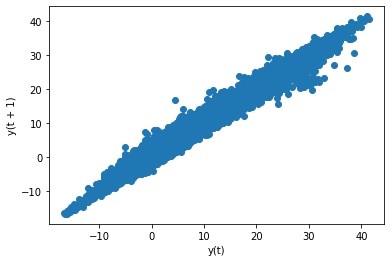

In [98]:
#If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
#If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
#Either relationship is good as they can be modeled.
#A ball in the middle or a spread across the plot suggests a weak or no relationship.

pd.plotting.lag_plot(aq_df['TEMP'],lag =1)

So, we can see that there is a positive correlation.

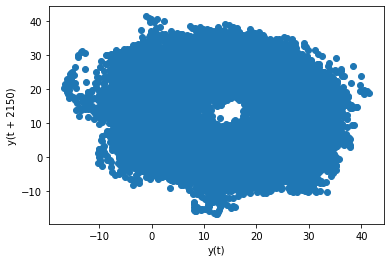

In [99]:
pd.plotting.lag_plot(aq_df['TEMP'],lag =2150)

So, no correlation.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7472A8588>,
      dtype=object)

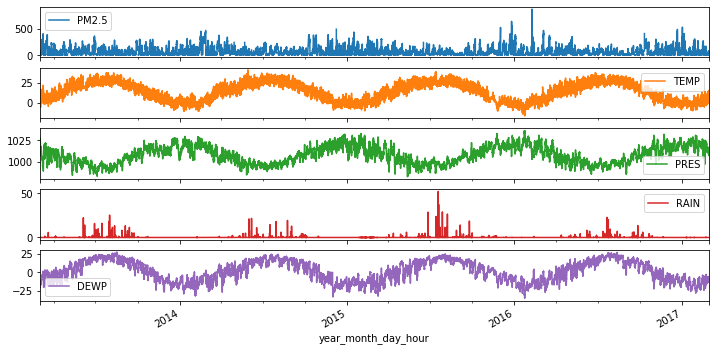

In [102]:
#Let's see with more features data :
multi_data = aq_df[['PM2.5','TEMP','PRES','RAIN','DEWP']]
multi_data.plot(subplots = True, figsize=(12,6))

So, PM2.5 has relation with features like - TEMP, PRES and DEWP 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B763340D48>,
      dtype=object)

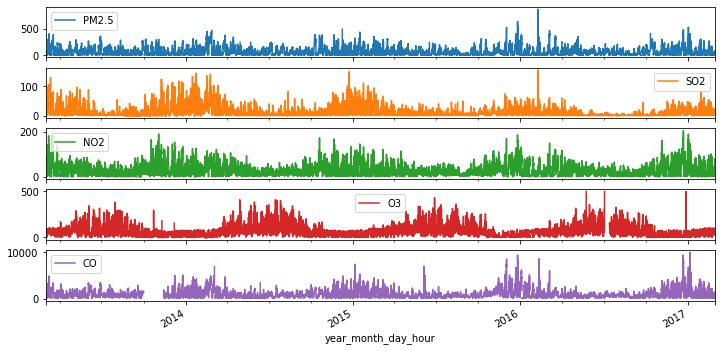

In [107]:
#Let's see relation with some other features :
multi_data = aq_df[['PM2.5','SO2','NO2','O3','CO']]
multi_data.plot(subplots = True, figsize=(12,6))

So, PM2.5 has positive relation with NO2,CO, and a slight negative with O3

In [109]:
#Again we can see the same information from pearson's correlation as well :
aq_corr = aq_df[['PM2.5','SO2','NO2','O3','CO','TEMP','PRES','RAIN','DEWP','wd','WSPM']].corr(method = 'pearson')
aq_corr

,PM2.5,SO2,NO2,O3,CO,TEMP,PRES,RAIN,DEWP,WSPM
PM2.5,1.000000,0.475117,0.718170,-0.100542,0.802737,-0.089939,-0.008005,-0.009221,0.134558,-0.255714
SO2,0.475117,1.000000,0.610433,-0.182096,0.529182,-0.312980,0.245297,-0.040201,-0.284595,-0.092249
NO2,0.718170,0.610433,1.000000,-0.373625,0.798753,-0.316337,0.200609,-0.032778,-0.109579,-0.302927
O3,-0.100542,-0.182096,-0.373625,1.000000,-0.303275,0.589474,-0.457838,0.029867,0.316821,0.265726
CO,0.802737,0.529182,0.798753,-0.303275,1.000000,-0.282312,0.172220,-0.004138,-0.031765,-0.269783
TEMP,-0.089939,-0.312980,-0.316337,0.589474,-0.282312,1.000000,-0.837844,0.035177,0.823684,-0.002456
PRES,-0.008005,0.245297,0.200609,-0.457838,0.172220,-0.837844,1.000000,-0.058766,-0.765659,0.086551
RAIN,-0.009221,-0.040201,-0.032778,0.029867,-0.004138,0.035177,-0.058766,1.000000,0.090351,0.007476
DEWP,0.134558,-0.284595,-0.109579,0.316821,-0.031765,0.823684,-0.765659,0.090351,1.000000,-0.313721
WSPM,-0.255714,-0.092249,-0.302927,0.265726,-0.269783,-0.002456,0.086551,0.007476,-0.313721,1.000000


As shown above CO and NO2 has the pearson's corr values near to 1, i.e 0.802737 and 0.718170. Which indicates CO, NO2 has strong positive correlation with PM2.5

PM2.5 has negative correlation with wind speed and with O3 it has a slight negative correlation.

In [106]:
#Let's check missing values:
aq_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [110]:
#For this practice purpose I am dropping all the missing values:
aq_df_na = aq_df.copy()
aq_df_na = aq_df_na.dropna()

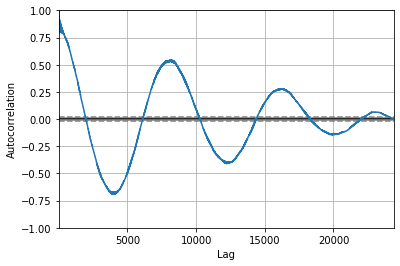

In [112]:
#It gives the lag value of the time series. Since this dataset is hourly so it shows Lag value as hours. We can see there is some kind of seasonality id the data.
#But this hourly based data is not easy to visualize
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

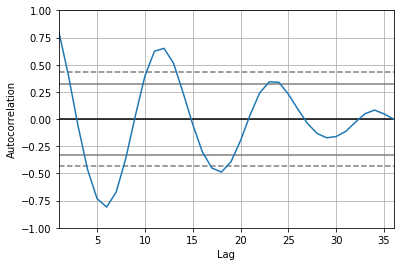

In [114]:
#Taking temp data on 1 month '1m':
aq_df_na['TEMP'].resample('1m').mean()

#And then plotting this data:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample('1m').mean())

In [123]:
aq_df_yearly = aq_df.resample('M').mean()

In [119]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [124]:
import pmdarima as pm
#by default auto arima uses AIC,the lower aic the model is good
model = pm.auto_arima(aq_df_yearly['PM2.5'],
                      m = 12, seasonal = True,
                      start_p = 0,start_q=0,max_order=4,test='adf',error_action = 'ignore',
                      suppress_warnings =True,
                      stepwise =True,trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=444.555, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=443.225, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=443.806, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=442.685, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=546.370, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=441.501, Time=0.08 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=442.786, Time=0.26 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=444.617, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=442.226, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=441.842, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=443.042, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=442.872, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=507.607, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 2.798 seconds


In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -217.751
Date:                Wed, 12 Aug 2020   AIC                            441.501
Time:                        01:56:49   BIC                            447.115
Sample:                             0   HQIC                           443.623
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     66.3148      5.897     11.245      0.000      54.757      77.873
ma.L1          0.3636      0.172      2.117      0.034       0.027       0.700
sigma2       508.8505     99.210      5.129      0.000     314.403     703.298
===================================================================================
Ljung-Box (Q):                       35.90   Jarque-Bera (JB):                20.58
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.30
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
train = aq_df_monthly[(aq_df_monthly.index.get_level_values(0)>='2012-01-31') & (aq_df_monthly.index.get_level_values(0)<='2017-04-30')]
test = aq_df_monthly[(aq_df_monthly.index.get_level_values(0)>'2017-04-30')]

In [127]:
print(train.shape)
print(test.shape)

(4, 12)
(1, 12)


In [128]:
test

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year_month_day_hour,,,,,,,,,,,,
2017-12-31,34356.5,68.365316,78.618337,13.264433,34.465714,1154.824875,53.803138,0.421493,1018.383239,-14.100998,0.001422,2.122553


In [130]:
model.fit(train['PM2.5'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [133]:
forecast = model.predict(n_periods=10,return_conf_int=True)
#return_conf_int is True means it will print the confidance interval too
#in forecasting model we always takes the confidence interval into the account

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
look at - 
https://github.com/priyadarshi0007/TimeSeries-AIEngineering/blob/master/Time_Series_AUTO_ARIMA.ipynb
    cell 46